In [93]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [94]:
upset_data = pd.read_csv("upset_data.csv")

In [102]:
upset_data

,YEAR,ROUND,SCORE_DIFF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,ORB,DRB,FTR,FTRD,X2P_O,X2P_D,X3P_O,X3P_D,ADJ_T,UPSET
0,2013,1,-20,-1,-4,2.6,-2.3,0.0575,0.2,-1.9,...,12.9,-0.8,8.5,12.1,-0.1,-4.1,0.4,1.5,-5.5,1.0
1,2013,1,12,-1,1,3.3,3.2,-0.0056,-2.0,2.5,...,2.7,-5.4,9.1,6.7,-3.0,3.0,0.2,0.9,-2.9,0.0
2,2013,1,-11,1,4,2.8,11.3,-0.1066,0.5,3.4,...,1.5,4.9,9.1,5.4,1.4,3.4,-0.6,2.4,9.0,1.0
3,2013,1,15,6,8,11.8,-10.0,0.2949,1.3,-3.2,...,3.6,3.3,-4.6,-1.7,3.0,-2.2,-1.0,-3.2,0.8,0.0
4,2013,1,12,2,-1,4.5,-0.1,0.0688,1.1,4.2,...,6.6,2.0,2.7,6.7,1.9,4.2,-1.5,2.7,1.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021,2,8,-3,2,-1.2,-8.7,0.0653,2.1,-3.6,...,-2.1,-8.0,-5.0,-4.6,0.3,-9.0,3.7,3.5,-3.5,0.0
379,2021,2,-15,-3,-1,-10.4,2.5,-0.1141,-0.2,1.8,...,-2.4,-1.4,-5.2,4.5,0.5,4.1,-0.7,-1.2,-2.8,1.0
380,2021,2,-34,2,2,3.5,2.0,0.0088,2.3,-1.6,...,4.8,0.4,7.0,-1.7,2.8,-3.7,1.0,1.6,-1.0,1.0
381,2021,2,14,6,4,2.5,-6.4,0.1310,-0.1,-4.2,...,-3.9,0.8,-2.7,-4.5,-0.1,-5.5,0.1,-1.6,-0.2,0.0


In [103]:
upset_data = upset_data.drop(["Unnamed: 0.1", "Unnamed: 0","LSEED","LSCORE","HSCORE","HSEED","HTEAM","LTEAM"], axis = 1)

KeyError: "['Unnamed: 0.1', 'Unnamed: 0', 'LSEED', 'LSCORE', 'HSCORE', 'HSEED', 'HTEAM', 'LTEAM'] not found in axis"

In [104]:
upset_data

,YEAR,ROUND,SCORE_DIFF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,ORB,DRB,FTR,FTRD,X2P_O,X2P_D,X3P_O,X3P_D,ADJ_T,UPSET
0,2013,1,-20,-1,-4,2.6,-2.3,0.0575,0.2,-1.9,...,12.9,-0.8,8.5,12.1,-0.1,-4.1,0.4,1.5,-5.5,1.0
1,2013,1,12,-1,1,3.3,3.2,-0.0056,-2.0,2.5,...,2.7,-5.4,9.1,6.7,-3.0,3.0,0.2,0.9,-2.9,0.0
2,2013,1,-11,1,4,2.8,11.3,-0.1066,0.5,3.4,...,1.5,4.9,9.1,5.4,1.4,3.4,-0.6,2.4,9.0,1.0
3,2013,1,15,6,8,11.8,-10.0,0.2949,1.3,-3.2,...,3.6,3.3,-4.6,-1.7,3.0,-2.2,-1.0,-3.2,0.8,0.0
4,2013,1,12,2,-1,4.5,-0.1,0.0688,1.1,4.2,...,6.6,2.0,2.7,6.7,1.9,4.2,-1.5,2.7,1.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021,2,8,-3,2,-1.2,-8.7,0.0653,2.1,-3.6,...,-2.1,-8.0,-5.0,-4.6,0.3,-9.0,3.7,3.5,-3.5,0.0
379,2021,2,-15,-3,-1,-10.4,2.5,-0.1141,-0.2,1.8,...,-2.4,-1.4,-5.2,4.5,0.5,4.1,-0.7,-1.2,-2.8,1.0
380,2021,2,-34,2,2,3.5,2.0,0.0088,2.3,-1.6,...,4.8,0.4,7.0,-1.7,2.8,-3.7,1.0,1.6,-1.0,1.0
381,2021,2,14,6,4,2.5,-6.4,0.1310,-0.1,-4.2,...,-3.9,0.8,-2.7,-4.5,-0.1,-5.5,0.1,-1.6,-0.2,0.0


In [105]:
X_train_cart = upset_data[upset_data["YEAR"]<=2018]
X_test_cart = upset_data[upset_data["YEAR"]>2018]

In [107]:
X_train_cart

,YEAR,ROUND,SCORE_DIFF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,ORB,DRB,FTR,FTRD,X2P_O,X2P_D,X3P_O,X3P_D,ADJ_T,UPSET
0,2013,1,-20,-1,-4,2.6,-2.3,0.0575,0.2,-1.9,...,12.9,-0.8,8.5,12.1,-0.1,-4.1,0.4,1.5,-5.5,1.0
1,2013,1,12,-1,1,3.3,3.2,-0.0056,-2.0,2.5,...,2.7,-5.4,9.1,6.7,-3.0,3.0,0.2,0.9,-2.9,0.0
2,2013,1,-11,1,4,2.8,11.3,-0.1066,0.5,3.4,...,1.5,4.9,9.1,5.4,1.4,3.4,-0.6,2.4,9.0,1.0
3,2013,1,15,6,8,11.8,-10.0,0.2949,1.3,-3.2,...,3.6,3.3,-4.6,-1.7,3.0,-2.2,-1.0,-3.2,0.8,0.0
4,2013,1,12,2,-1,4.5,-0.1,0.0688,1.1,4.2,...,6.6,2.0,2.7,6.7,1.9,4.2,-1.5,2.7,1.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2018,2,25,3,3,12.6,-4.4,0.1604,4.8,-4.0,...,7.8,1.8,4.5,-18.3,5.6,-5.2,2.0,-1.2,1.3,0.0
284,2018,2,7,4,0,7.5,-8.5,0.3621,0.4,-2.5,...,0.0,3.6,3.6,6.0,5.3,-2.1,-4.1,-2.0,-2.8,0.0
285,2018,2,-1,2,6,-3.7,3.4,-0.0781,6.9,0.7,...,-11.3,-5.2,-3.3,-12.4,9.3,1.0,1.8,0.2,-0.7,1.0
286,2018,2,23,2,1,12.1,-6.7,0.2720,-4.3,0.0,...,14.6,-2.2,-1.8,15.2,-6.7,-3.3,-0.6,3.0,-4.7,0.0


In [108]:
X_train_cart = X_train_cart.drop(["YEAR","ROUND"], axis =1 )
X_test_cart = X_test_cart.drop(["YEAR","ROUND"], axis =1 )
Y_train = X_train_cart["UPSET"]
Y_test = X_test_cart["UPSET"]


X_train = X_train_cart.drop(["SCORE_DIFF","UPSET"], axis =1 )
X_test = X_test_cart.drop(["SCORE_DIFF","UPSET"], axis =1 )




In [109]:
X_train

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,X2P_O,X2P_D,X3P_O,X3P_D,ADJ_T
0,-1,-4,2.6,-2.3,0.0575,0.2,-1.9,5.8,0.3,12.9,-0.8,8.5,12.1,-0.1,-4.1,0.4,1.5,-5.5
1,-1,1,3.3,3.2,-0.0056,-2.0,2.5,-1.7,-1.1,2.7,-5.4,9.1,6.7,-3.0,3.0,0.2,0.9,-2.9
2,1,4,2.8,11.3,-0.1066,0.5,3.4,0.2,3.5,1.5,4.9,9.1,5.4,1.4,3.4,-0.6,2.4,9.0
3,6,8,11.8,-10.0,0.2949,1.3,-3.2,-1.8,1.6,3.6,3.3,-4.6,-1.7,3.0,-2.2,-1.0,-3.2,0.8
4,2,-1,4.5,-0.1,0.0688,1.1,4.2,5.1,3.3,6.6,2.0,2.7,6.7,1.9,4.2,-1.5,2.7,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,3,3,12.6,-4.4,0.1604,4.8,-4.0,2.2,-5.3,7.8,1.8,4.5,-18.3,5.6,-5.2,2.0,-1.2,1.3
284,4,0,7.5,-8.5,0.3621,0.4,-2.5,0.0,0.9,0.0,3.6,3.6,6.0,5.3,-2.1,-4.1,-2.0,-2.8
285,2,6,-3.7,3.4,-0.0781,6.9,0.7,1.2,-1.0,-11.3,-5.2,-3.3,-12.4,9.3,1.0,1.8,0.2,-0.7
286,2,1,12.1,-6.7,0.2720,-4.3,0.0,-0.7,4.9,14.6,-2.2,-1.8,15.2,-6.7,-3.3,-0.6,3.0,-4.7


In [110]:

clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train,Y_train)

In [111]:
preds = clf.predict(X_test)

In [112]:
clf.score(X_test,Y_test)

0.9052631578947369

In [113]:
X_train

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,X2P_O,X2P_D,X3P_O,X3P_D,ADJ_T
0,-1,-4,2.6,-2.3,0.0575,0.2,-1.9,5.8,0.3,12.9,-0.8,8.5,12.1,-0.1,-4.1,0.4,1.5,-5.5
1,-1,1,3.3,3.2,-0.0056,-2.0,2.5,-1.7,-1.1,2.7,-5.4,9.1,6.7,-3.0,3.0,0.2,0.9,-2.9
2,1,4,2.8,11.3,-0.1066,0.5,3.4,0.2,3.5,1.5,4.9,9.1,5.4,1.4,3.4,-0.6,2.4,9.0
3,6,8,11.8,-10.0,0.2949,1.3,-3.2,-1.8,1.6,3.6,3.3,-4.6,-1.7,3.0,-2.2,-1.0,-3.2,0.8
4,2,-1,4.5,-0.1,0.0688,1.1,4.2,5.1,3.3,6.6,2.0,2.7,6.7,1.9,4.2,-1.5,2.7,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,3,3,12.6,-4.4,0.1604,4.8,-4.0,2.2,-5.3,7.8,1.8,4.5,-18.3,5.6,-5.2,2.0,-1.2,1.3
284,4,0,7.5,-8.5,0.3621,0.4,-2.5,0.0,0.9,0.0,3.6,3.6,6.0,5.3,-2.1,-4.1,-2.0,-2.8
285,2,6,-3.7,3.4,-0.0781,6.9,0.7,1.2,-1.0,-11.3,-5.2,-3.3,-12.4,9.3,1.0,1.8,0.2,-0.7
286,2,1,12.1,-6.7,0.2720,-4.3,0.0,-0.7,4.9,14.6,-2.2,-1.8,15.2,-6.7,-3.3,-0.6,3.0,-4.7


[Text(0.39705882352941174, 0.9, 'X[5] <= -0.013\ngini = 0.392\nsamples = 288\nvalue = [211, 77]'),
 Text(0.11764705882352941, 0.7, 'X[2] <= 1.5\ngini = 0.18\nsamples = 60\nvalue = [6, 54]'),
 Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.17647058823529413, 0.5, 'X[6] <= -0.55\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.11764705882352941, 0.3, 'X[7] <= -1.15\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.058823529411764705, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.17647058823529413, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.23529411764705882, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6764705882352942, 0.7, 'X[5] <= 0.068\ngini = 0.181\nsamples = 228\nvalue = [205, 23]'),
 Text(0.47058823529411764, 0.5, 'X[2] <= 3.5\ngini = 0.368\nsamples = 74\nvalue = [56, 18]'),
 Text(0.35294117647058826, 0.3, 'X[12] <= -2.15\ngini = 0.489\nsamples = 40\nvalue = [23, 17]'),
 Text(0.29411764705882

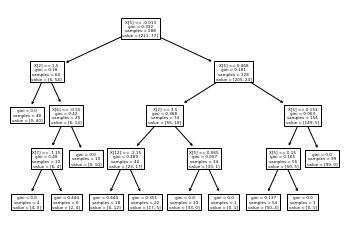

In [87]:
tree.plot_tree(clf)

In [54]:
clf.score(X_train,Y_train)

0.90625

In [45]:
from sklearn import metrics 
metrics.confusion_matrix(Y_test, clf.predict(X_test))

array([[65,  0],
       [ 9, 21]])

## XGBoost Classifier

In [114]:
import xgboost as xgb
xgbC = xgb.XGBClassifier(max_depth = 3)

In [115]:
xgbC.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [116]:
xgbC.score(X_test,Y_test)

0.9157894736842105

In [117]:
xgbC.score(X_train,Y_train)

1.0

In [81]:
params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
        'max_depth': [2, 3, 4, 5],
        'n_estimators': [20,50,100,300,500,1000]
        }

xgb_grid = GridSearchCV(xgb.XGBClassifier(),
                        params,
                        cv = 5,
                        n_jobs = 5,
                        scoring = 'accuracy',
                        verbose=True)

xgb_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [82]:
xgb_grid.score(X_test,Y_test)

0.9052631578947369

In [78]:
metrics.confusion_matrix(Y_test,xgb_grid.best_estimator_.predict(X_test))

array([[62,  3],
       [ 5, 25]])

In [83]:
xgb_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}